<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/notebooks/T6_pytorch_dataset_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing PyTorch

In [1]:
#!pip install torch

In [2]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 2.6.0+cu124


## Building input pipelines in PyTorch with DataLoader

A lot of effort in solving any machine learning problem goes into preparing the data. PyTorch provides many tools to make data loading easy and hopefully, to make your code more readable.

For a general overview of PyTorch data loading utility see https://docs.pytorch.org/docs/stable/data.html. The following script creates a PyTorch **DataLoader** from existing tensors

In [3]:
from torch.utils.data import DataLoader

t = torch.rand([4, 3], dtype=torch.float32) # tensor (see Ch 12)
data_loader = DataLoader(dataset=t)
for item in data_loader:
    print(item)

tensor([[0.3817, 0.7759, 0.5370]])
tensor([[0.4844, 0.2714, 0.0614]])
tensor([[0.6096, 0.2594, 0.0968]])
tensor([[0.4079, 0.8751, 0.0326]])


DataLoader allows to create batches of examples

In [4]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([[0.3817, 0.7759, 0.5370],
        [0.4844, 0.2714, 0.0614],
        [0.6096, 0.2594, 0.0968]])
batch 2: tensor([[0.4079, 0.8751, 0.0326]])


In supervised ML, examples have labels. Therefore, we want the DataLoader to combine examples and labels

In [5]:
from torch.utils.data import TensorDataset

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0],
          '  y: ', example[1])

  x:  tensor([0.7195, 0.5678, 0.9360])   y:  tensor(0)
  x:  tensor([0.5761, 0.7633, 0.3852])   y:  tensor(1)
  x:  tensor([0.9159, 0.0786, 0.3113])   y:  tensor(2)
  x:  tensor([0.8746, 0.4390, 0.8691])   y:  tensor(3)


**Mini batches** and **shuffling**. One main reason we want to use DataLoader in our torch ML pipeline is that it makes it safe to, for instance, shuffle the data without losing the element-wise correspondance between features (X) and labels (y).

In [9]:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 1: x: tensor([[0.7195, 0.5678, 0.9360],
        [0.5761, 0.7633, 0.3852]]) 
         y: tensor([0, 1])
batch 2: x: tensor([[0.8746, 0.4390, 0.8691],
        [0.9159, 0.0786, 0.3113]]) 
         y: tensor([3, 2])
epoch 1
batch 1: x: tensor([[0.9159, 0.0786, 0.3113],
        [0.8746, 0.4390, 0.8691]]) 
         y: tensor([2, 3])
batch 2: x: tensor([[0.5761, 0.7633, 0.3852],
        [0.7195, 0.5678, 0.9360]]) 
         y: tensor([1, 0])
epoch 2
batch 1: x: tensor([[0.8746, 0.4390, 0.8691],
        [0.5761, 0.7633, 0.3852]]) 
         y: tensor([3, 1])
batch 2: x: tensor([[0.9159, 0.0786, 0.3113],
        [0.7195, 0.5678, 0.9360]]) 
         y: tensor([2, 0])


Up to this point, we created the dataloader from existing tensors. In general, we need PyTorch for supervised ML problems where the examples are more complex and are usually available as individual files like **images**, **text** or **audio** files. So, we want to know how to **create a dataloader from files in our local storage**.

Download images (3 cat images, 3 dog images)  from https://github.com/rasbt/machine-learning-book/tree/main/ch12/cat_dog_images (or download the zip file https://github.com/isa-ulisboa/greends-pml/blob/main/data/cat_dog_images.zip) -- you can instead get any other images: just be sure that the name of the file contains the label since labels will be derived from the files names in this case.

Upload the 6 images to Colab session storage if you're using it. Note that the images are grouped into a folder named `cat_dog_images`.

Now, let's create the file names list (using `pathlib`), which will allow PyTorch to access our input data.

In [18]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Let's look at the images. Note that they have different sizes. Note also that the file name contains the label: *dog* or *cat*.

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


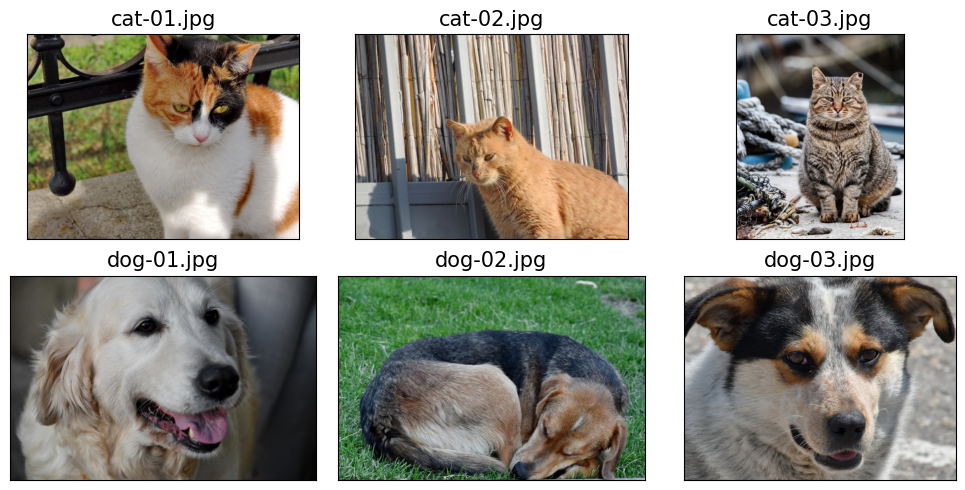

In [19]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

The code below shows how to derive a numerical label (0 or 1) from the file name.

In [20]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [ ]:
PyTorch provides the class `Dataset`. The best practice is to create a custom `Dataset` subclass which is designed for your particular data.

In [21]:
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


As we saw, image sizes in out data set are not the same. For deep learning we need that all our images have the same number of rows and columns, say 80 rows (height) and 120 columns (width). This can be achieved adding a pre-processing step to the dataloader.

In [26]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

image_dataset = ImageDataset(file_list, labels, transform)

If we access the contents of the `Dataset`object, we can check how the transformed images look, and what is their size.

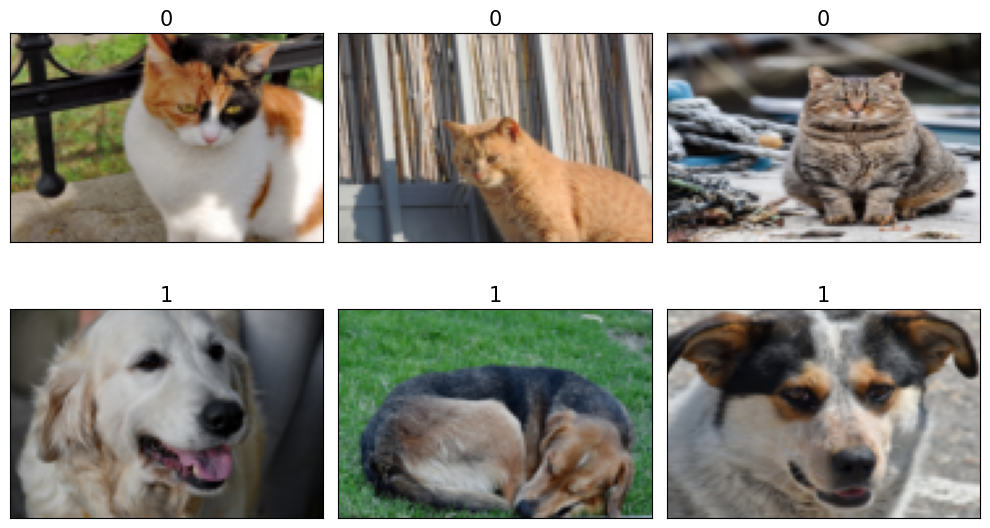

In [28]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

So far, we computed labels separatly, and called `ImageDataset` using both the file list and the labels (and also the transform in the last example) as arguments. However, we should be able to design our class so the labels are derived autonmatically from the file names.

Exercise: adapt the class below (that has only argument `file_list` and derives the label from the file name) such that it returns the same label value as before: 1 for dog and 0 for cat.

In [29]:
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, file_list):
        self.file_list = file_list
        # Extract the first three characters from each file name as the label
        self.labels = [self._extract_label(file) for file in file_list]

    def _extract_label(self, file):
        # Assumes file is a path or filename string
        import os
        filename = os.path.basename(file)
        return filename[:3]

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.file_list)

image_dataset = ImageDataset(file_list)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg cat
cat_dog_images/cat-02.jpg cat
cat_dog_images/cat-03.jpg cat
cat_dog_images/dog-01.jpg dog
cat_dog_images/dog-02.jpg dog
cat_dog_images/dog-03.jpg dog


## Access torchvision datasets

`torchvision` contains the module `datasets` that allows to access several known datasets, including the `MNIST` data set of hand written digits. The code below shows how to read and transform the input images creating a `DataLoader` object. The `DataLoader` object can then be subsetted for further processing. Note that the data is stored internally in folder `..\data\mnist`.

In [31]:
import torch
import torchvision

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/data/mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                             ])),
  batch_size=16, shuffle=False)
test_ds  = torch.utils.data.Subset(train_loader.dataset, range(0, 50000-1))
valid_ds = torch.utils.data.Subset(train_loader.dataset, range(50000, 60000-1))
for i in range(0, 10):
    ty = test_ds[i][1] # 2nd dimension: 0 for the example, 1 for the label
    vy = valid_ds[i][1]
    print(ty, vy)

5 3
0 8
4 6
1 9
9 6
2 4
1 5
3 3
1 8
4 4
